In [2]:
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt


Generate two gaussian distribution

In [3]:
mu1, sigma1 = 2, 1
mu2, sigma2 = -1, 0.8
X1 = np.random.normal(mu1, sigma1, size=200)
X2 = np.random.normal(mu2, sigma2, size=600)
X = np.concatenate([X1, X2])

In [4]:
X1.shape, X2.shape, X.shape

((200,), (600,), (800,))

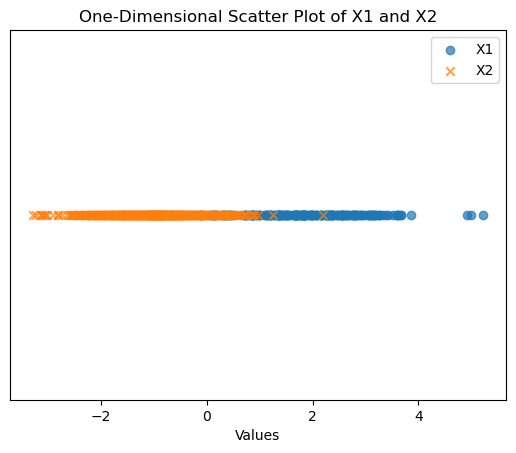

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate X1 and X2 samples
mu1, sigma1 = 2, 1
mu2, sigma2 = -1, 0.8
X1 = np.random.normal(mu1, sigma1, size=200)
X2 = np.random.normal(mu2, sigma2, size=600)

# Use y=0 for both sets (or add a tiny offset for clarity)
y1 = np.zeros_like(X1)
y2 = np.zeros_like(X2)

plt.scatter(X1, y1, alpha=0.7, label='X1')
plt.scatter(X2, y2, alpha=0.7, label='X2', marker='x')  # Using a different marker for X2

plt.xlabel('Values')
plt.title('One-Dimensional Scatter Plot of X1 and X2')
plt.yticks([])  # Hide the y-axis ticks
plt.legend()

plt.show()


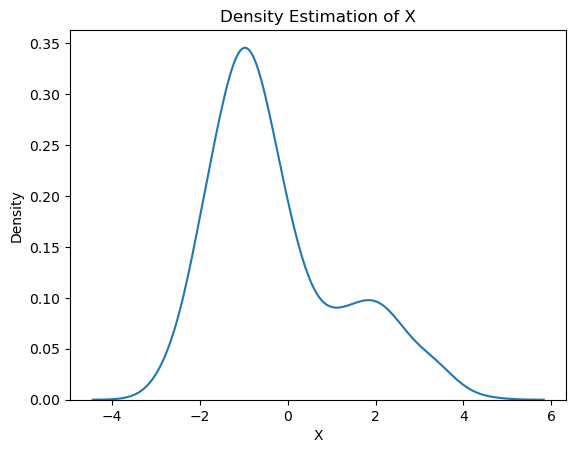

In [6]:
sns.kdeplot(X)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Estimation of X')
plt.show()

Initialize

In [7]:
mu1_hat, sigma1_hat = np.mean(X1), np.std(X1)
mu2_hat, sigma2_hat = np.mean(X2), np.std(X2)
pi1_hat, pi2_hat = len(X1) / len(X), len(X2) / len(X)


<Axes: ylabel='Density'>

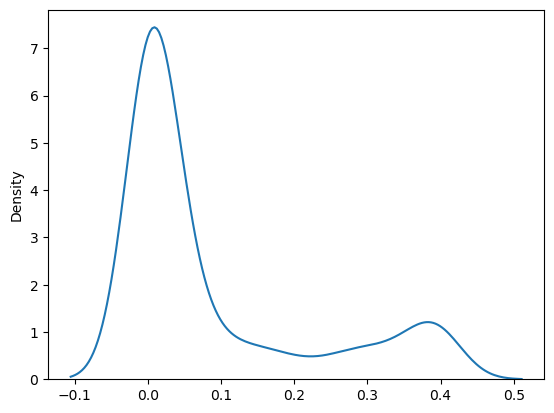

In [8]:
sns.kdeplot(norm.pdf(X, mu1_hat, sigma1_hat))

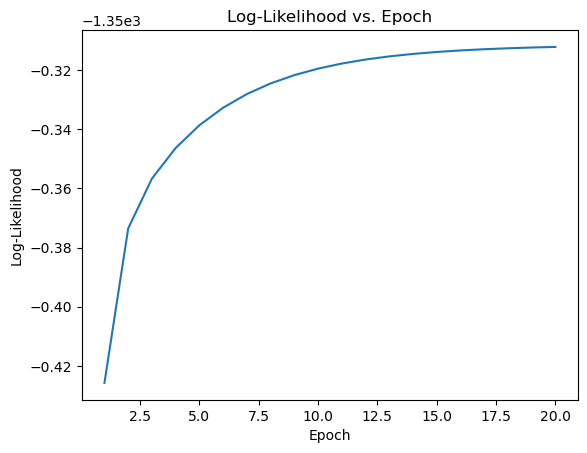

In [9]:
num_epochs = 20
log_likelihoods = []

for epoch in range(num_epochs):
    # E-step: Compute responsibilities
    gamma1 = pi1_hat * norm.pdf(X, mu1_hat, sigma1_hat)
    gamma2 = pi2_hat * norm.pdf(X, mu2_hat, sigma2_hat)
    total = gamma1 + gamma2
    gamma1 /= total
    gamma2 /= total
    
    # M-step: Update parameters
    mu1_hat = np.sum(gamma1 * X) / np.sum(gamma1)
    mu2_hat = np.sum(gamma2 * X) / np.sum(gamma2)
    sigma1_hat = np.sqrt(np.sum(gamma1 * (X - mu1_hat)**2) / np.sum(gamma1))
    sigma2_hat = np.sqrt(np.sum(gamma2 * (X - mu2_hat)**2) / np.sum(gamma2))
    pi1_hat = np.mean(gamma1)
    pi2_hat = np.mean(gamma2)
    
    # Compute log-likelihood
    log_likelihood = np.sum(np.log(pi1_hat * norm.pdf(X, mu1_hat, sigma1_hat)
                                   + pi2_hat * norm.pdf(X, mu2_hat, sigma2_hat)))
    log_likelihoods.append(log_likelihood)


plt.plot(range(1, num_epochs+1), log_likelihoods)
plt.xlabel('Epoch')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Epoch')
plt.show()


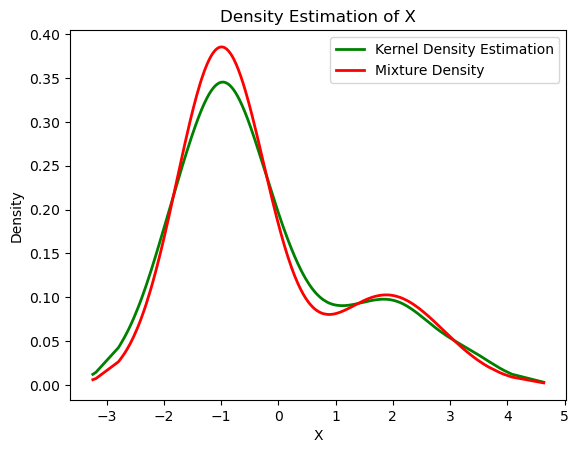

In [10]:
X_sorted = np.sort(X)
density_estimation = pi1_hat*norm.pdf(X_sorted,
                                        mu1_hat, 
                                        sigma1_hat) + pi2_hat * norm.pdf(X_sorted,
                                                                         mu2_hat, 
                                                                         sigma2_hat)


plt.plot(X_sorted, gaussian_kde(X_sorted)(X_sorted), color='green', linewidth=2)
plt.plot(X_sorted, density_estimation, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Estimation of X')
plt.legend(['Kernel Density Estimation','Mixture Density'])
plt.show()


https://www.geeksforgeeks.org/ml-expectation-maximization-algorithm/